### Efficient Pedestrian Detection Model Using OpenCV
The idea behind object identification is to help computers detect and segregate between several objects. Although each human is unique and has various different features, all humans have some things in common. It's the general physical apperaence i.e face,legs,hands etc are commmon amongst most of us.
We can use computer vision to exploit this semi-rigid structure and extract features to quantify the human body. These features can be passed on to machine learning models that when trained can be used to detect and track humans in images and video streams. The idea is to identify the amalgamation of such features. Generally speaking every pedestrian walking on the side of the road wil have legs and heads, so if the model is able to detect such feaatures and takes multiple overlapping boxes and is able to reduce them to a single bounding box, we will be able to Detect a pedestrian. 
###### This is called the non-maxima suppression algorithm


###### Importing required libraries

In [33]:
from __future__ import print_function
from imutils.object_detection import non_max_suppression
from imutils import paths
import numpy as np
import argparse
import imutils
import cv2

Lucky for us OpenCV ships with a pre-trained HOG + Linear SVM model that can be used to perform pedestrian detection in both images and video streams. HOG stands for Histogram of Oriented Gradients.
We will be using that to our advantage

In [34]:
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

In [35]:
originalImages=[]
Pedestrians=[]

We will be using the imutils library to extract images from the path and we will use OPENCV to read the images. 
We will let the model detect pedestrians in the images. Then we will apply non-maxima suppression to the bounding boxes using a
fairly large overlap threshold to try to maintain overlapping boxes that are still people. This will help us gain and improved result. We will then use the boundraies to create boxes on the original images. Hopefully the part of the images within the boxes will be distinct human beings.

In [36]:
for imagePath in paths.list_images("D:/Outstanding Project/Pedestrian"):
    # load the image and resize it to (1) reduce detection time
    # and (2) improve detection accuracy
    image = cv2.imread(imagePath)
    originalImages.append(image)
    image = imutils.resize(image, width=min(400, image.shape[1]))
    orig = image.copy()
    # detect people in the image
    (rects, weights) = hog.detectMultiScale(image, winStride=(4, 4),
        padding=(8, 8), scale=1.05)
    # draw the original bounding boxes
    for (x, y, w, h) in rects:
        cv2.rectangle(orig, (x, y), (x + w, y + h), (0, 0, 255), 2)
        
    rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])
    pick = non_max_suppression(rects, probs=None, overlapThresh=0.65)
    # draw the final bounding boxes
    for (xA, yA, xB, yB) in pick:
        cv2.rectangle(image, (xA, yA), (xB, yB), (0, 255, 0), 2)
    # show some information on the number of bounding boxes
    filename = imagePath[imagePath.rfind("/") + 1:]
    print("[INFO] {}: {} original boxes, {} after suppression".format(
        filename, len(rects), len(pick)))
    # show the output images
    cv2.imshow("Before NMS", orig)
    cv2.imshow("After NMS", image)
    Pedestrians.append(image)
    cv2.waitKey(0)

[INFO] Pedestrian\20200630-031442-ENT sheriff won't enforce mask rule 7-1-20.jpg: 3 original boxes, 3 after suppression
[INFO] Pedestrian\2RJN2JG3QFEAFJDLTR76LC3S3U.jpg: 2 original boxes, 2 after suppression
[INFO] Pedestrian\download (3).jpg: 0 original boxes, 0 after suppression
[INFO] Pedestrian\download.jpg: 1 original boxes, 1 after suppression
[INFO] Pedestrian\empty-streets-effect-pandemic-unexpected-lesson-life-after-cars-2.jpg: 0 original boxes, 0 after suppression
[INFO] Pedestrian\images.jpg: 1 original boxes, 1 after suppression
[INFO] Pedestrian\james-weber-japan-cover.jpg: 5 original boxes, 5 after suppression
[INFO] Pedestrian\Pedestrians800x450.jpg: 2 original boxes, 2 after suppression
[INFO] Pedestrian\people-using-crosswalk-1024x569.jpg: 4 original boxes, 4 after suppression


## Original Images

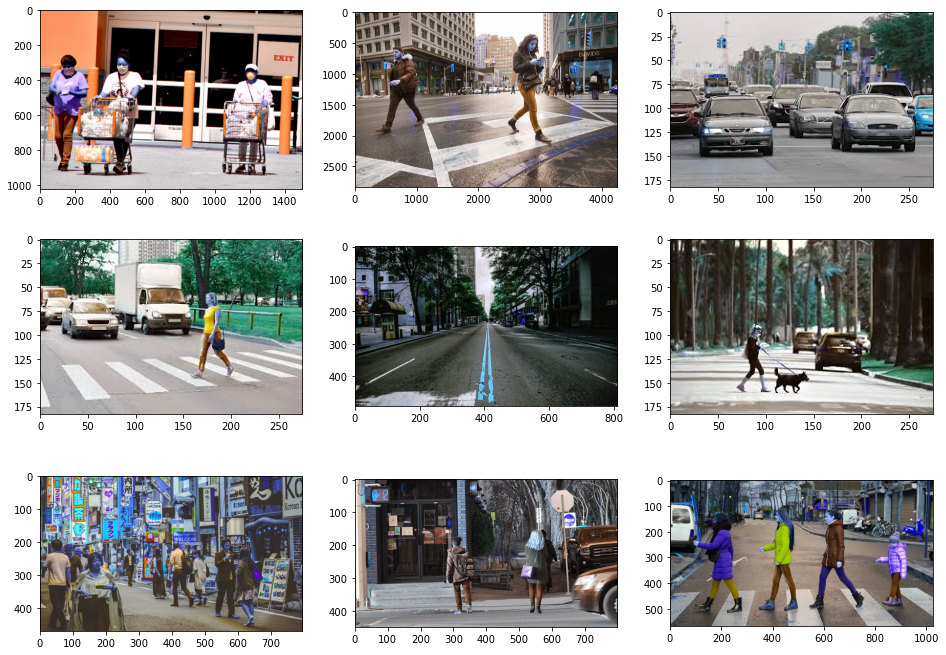

In [37]:
import matplotlib.pyplot as plt
w=10
h=10
fig=plt.figure(figsize=(16, 16))
columns = 3
rows = 4
i=1
for imgs in originalImages:
    fig.add_subplot(rows, columns, i)
    plt.imshow(imgs)
    i+=1
plt.show()

### Images After Running our Pedestrian Detection model

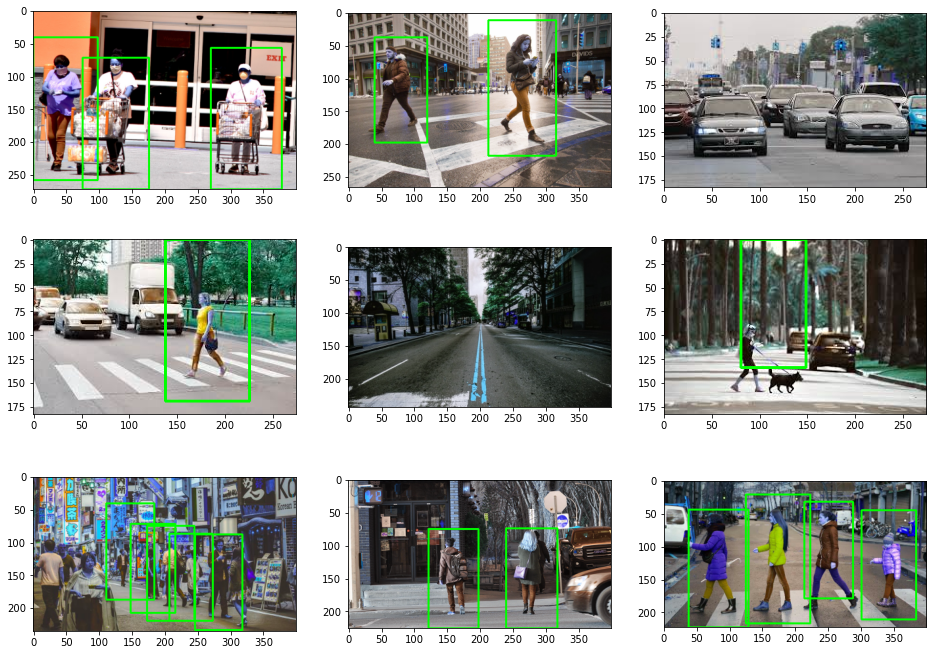

In [38]:
import matplotlib.pyplot as plt
w=10
h=10
fig=plt.figure(figsize=(16, 16))
columns = 3
rows = 4
i=1
for imgs in Pedestrians:
    fig.add_subplot(rows, columns, i)
    plt.imshow(imgs)
    i+=1
plt.show()